/var/folders/bj/cqz9v_7s4pxcpym130bfjj0w0000gr/T/ipykernel_71389/434884312.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buys['year'] = buys['trandate'].dt.year


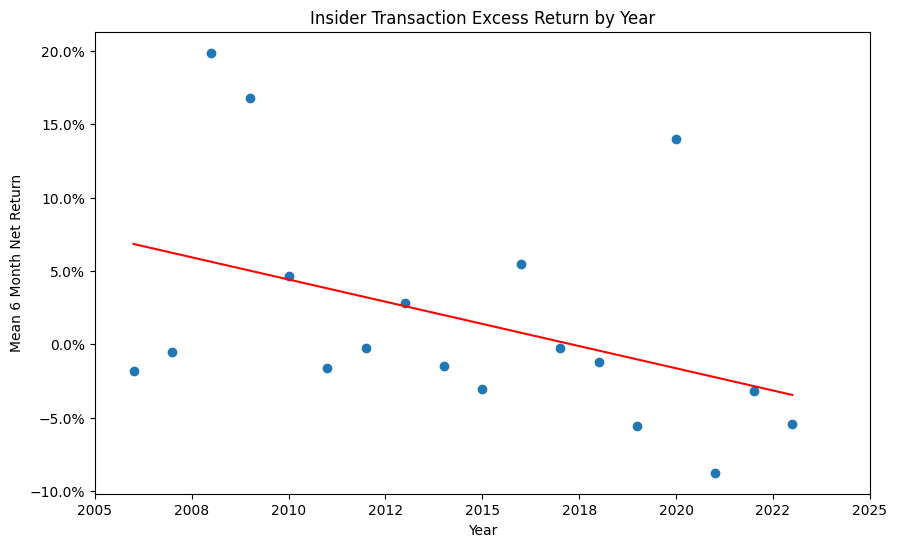

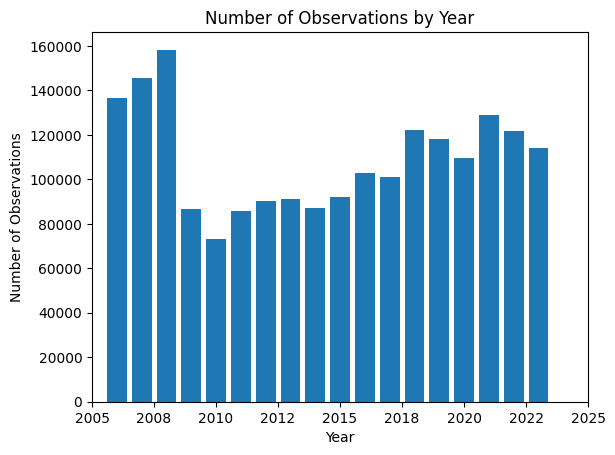

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

insiders_df = pd.read_pickle("merge_etf_2.pkl")
# insiders_df = pd.read_pickle("CRSP_merged.pkl")

buys = insiders_df[insiders_df['acqdisp'] == 'A']
sells = insiders_df[insiders_df['acqdisp'] == 'D']
buys['year'] = buys['trandate'].dt.year
buys = buys[((buys['year'] >= 2006) & (buys['year'] <= 2023))]
mean_net_ret_by_year = buys.groupby('year')['net_ret'].mean().reset_index()

import numpy as np
x = mean_net_ret_by_year['year'].values
y = mean_net_ret_by_year['net_ret'].values

coefficients = np.polyfit(x, y, deg=1)
poly_eq = np.poly1d(coefficients)
y_fit = poly_eq(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='', label='Data Points')
plt.plot(x, y_fit, color='red', linestyle='-', label='Fitted Line')
plt.title('Insider Transaction Excess Return by Year')
plt.xlabel('Year')
plt.ylabel('Mean 6 Month Net Return')

# Set y-axis labels to percentage
formatter = mticker.PercentFormatter(xmax=1, decimals=1)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlim(2005, 2025)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))
plt.grid(False)
plt.savefig('figures/mean_excess_ret_by_year.pdf')
plt.show()

obs_count_by_year = buys['year'].value_counts().sort_index()
plt.bar(obs_count_by_year.index, obs_count_by_year.values)
plt.title('Number of Observations by Year')
plt.xlabel('Year')
plt.xlim(2005, 2025)
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))
plt.ylabel('Number of Observations')
plt.grid(False)

In [13]:
mean_net_ret_by_year

,year,net_ret
0,2006,-0.008706
1,2007,-0.009632
2,2008,-0.009200
3,2009,0.055311
4,2010,0.025010
5,2011,-0.054225
6,2012,0.011255
7,2013,0.021286
8,2014,-0.020431
9,2015,-0.039540


In [3]:
buys

,dcn,seqnum,personid,owner,rolecode1,rolecode2,rolecode3,rolecode4,cname,ticker,...,end_date_etf,first_date_etf,last_date_etf,n_periods_etf,n_miss_etf,min_ret_etf,max_ret_etf,cum_return_etf,net_ret,year
957366,061016685,1,12011695,ALLISON JOHN W,DO,NaN,NaN,NaN,HOME BANCSHARES INC,HOMB,...,2007-02-01,2006-08-01,2007-02-01,127.0,0.0,-0.015543,0.016845,0.059881,0.000245,2006
1070413,061000029,1,12089001,CRITES JOHN W,D,NaN,NaN,NaN,SUMMIT FINANCIAL GROUP INC WV,SMMF,...,2007-02-02,2006-08-02,2007-02-02,127.0,0.0,-0.015543,0.016845,0.062139,-0.038245,2006
1070416,061000087,1,15044980,HELLMANN JOHN C,P,OD,NaN,NaN,GENESEE & WYOMING INC,GWR,...,2007-02-01,2006-08-01,2007-02-01,127.0,0.0,-0.028356,0.034202,0.060307,-0.033698,2006
1070417,061000088,1,12028939,FULLER MORTIMER B III,CEO,CB,OD,NaN,GENESEE & WYOMING INC,GWR,...,2007-02-01,2006-08-01,2007-02-01,127.0,0.0,-0.028356,0.034202,0.060307,-0.033698,2006
1070418,061000088,2,12028939,FULLER MORTIMER B III,CEO,CB,OD,NaN,GENESEE & WYOMING INC,GWR,...,2007-02-01,2006-08-01,2007-02-01,127.0,0.0,-0.028356,0.034202,0.060307,-0.033698,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663760,se00294559,1,16311594,KAZARIAN CAMILLE,CFO,O,EVP,NaN,SUMMIT STATE BANK,SSBI,...,2023-10-03,2023-04-03,2023-10-03,127.0,0.0,-0.022672,0.024723,0.006883,0.057358,2023
7663761,se00294560,1,16307338,DEL SECCO GENIE A,CO,O,EVP,NaN,SUMMIT STATE BANK,SSBI,...,2023-10-03,2023-04-03,2023-10-03,127.0,0.0,-0.022672,0.024723,0.006883,0.057358,2023
7663762,se00294561,1,16363634,CASTLIO MICHAEL J,O,EVP,NaN,NaN,SUMMIT STATE BANK,SSBI,...,2023-10-03,2023-04-03,2023-10-03,127.0,0.0,-0.022672,0.024723,0.006883,0.057358,2023
7663763,se00294722,1,16296226,CORRIGAN MARGARET A,B,NaN,NaN,NaN,HINGHAM INSTITUTION FOR SAVINGS,HIFS,...,2022-10-19,2022-04-19,2022-10-19,128.0,0.0,-0.037240,0.041268,-0.061022,-0.070697,2022


In [4]:
buys['net_ret'].describe()

count    1.532094e+06
mean    -7.784854e-03
std      1.386148e-01
min     -9.234099e-01
25%     -6.695702e-02
50%     -6.398190e-03
75%      4.999347e-02
max      4.414014e+00
Name: net_ret, dtype: float64

In [14]:
import statsmodels.api as sm
x = buys['year'].values
y = buys['net_ret'].values

x = sm.add_constant(x)

# Perform the regression
model = sm.OLS(y, x).fit(cov_type='cluster', cov_kwds={'groups': buys['dcn'].values})

# Print the summary, which includes coefficients, standard errors, and other statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     221.8
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           3.67e-50
Time:                        17:36:29   Log-Likelihood:            -7.8952e+05
No. Observations:             2496264   AIC:                         1.579e+06
Df Residuals:                 2496262   BIC:                         1.579e+06
Df Model:                           1                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6937      0.249     14.834      0.000       3.206       4.182
x1            -0.0018      0.000    -14.894      0.000      -0.002      -0.002
==============================================================================
Omnibus:                  4414953.032   Durbin-Watson:                   0.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      65911943647.364
Skew:                          11.682   Prob(JB):                         0.00
Kurtosis:                     798.711   Cond. No.                     6.89e+05
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 6.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

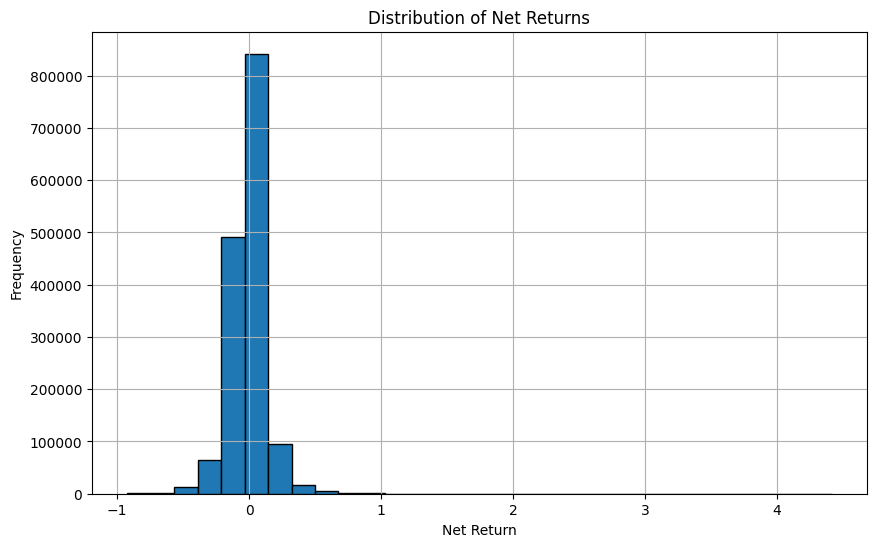

In [6]:
import matplotlib.pyplot as plt

# Assuming buys is your DataFrame and 'net_ret' is a column in it
plt.figure(figsize=(10, 6))
plt.hist(buys['net_ret'], bins=30, edgecolor='black')
plt.title('Distribution of Net Returns')
plt.xlabel('Net Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
buys['net_ret'].describe()

count    1.532094e+06
mean    -7.784854e-03
std      1.386148e-01
min     -9.234099e-01
25%     -6.695702e-02
50%     -6.398190e-03
75%      4.999347e-02
max      4.414014e+00
Name: net_ret, dtype: float64

1th percentile: -0.38867755980735597
99th percentile: 0.39250105545706315


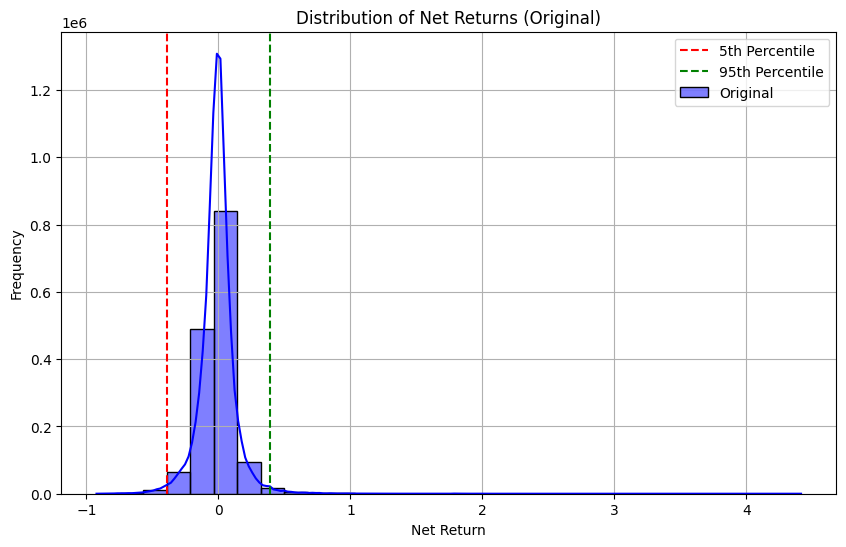

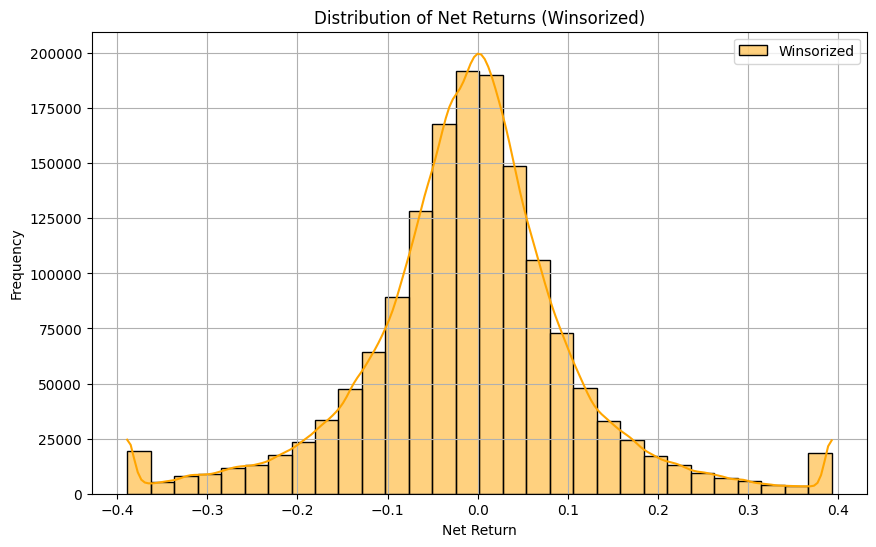

In [8]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns
p1 = np.percentile(buys['net_ret'], 1)
p99 = np.percentile(buys['net_ret'], 99)

# Print the percentiles
print(f"1th percentile: {p1}")
print(f"99th percentile: {p99}")

# Apply Winsorization
buys['net_ret_winsorized'] = winsorize(buys['net_ret'], limits=[0.01, 0.01])

# Plot the histogram of the original 'net_ret'
plt.figure(figsize=(10, 6))
sns.histplot(buys['net_ret'], bins=30, kde=True, color="blue", label="Original")
plt.axvline(x=p1, color='r', linestyle='--', label='5th Percentile')
plt.axvline(x=p99, color='g', linestyle='--', label='95th Percentile')
plt.title('Distribution of Net Returns (Original)')
plt.xlabel('Net Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot the histogram of the winsorized 'net_ret'
plt.figure(figsize=(10, 6))
sns.histplot(buys['net_ret_winsorized'], bins=30, kde=True, color="orange", label="Winsorized")
plt.title('Distribution of Net Returns (Winsorized)')
plt.xlabel('Net Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import statsmodels.api as sm
x = buys['year'].values
y = buys['net_ret_winsorized'].values

x = sm.add_constant(x)

# Perform the regression
model = sm.OLS(y, x).fit(cov_type='cluster', cov_kwds={'groups': buys['dcn'].values})

# Print the summary, which includes coefficients, standard errors, and other statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1358.
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          4.60e-297
Time:                        19:51:46   Log-Likelihood:             1.0558e+06
No. Observations:             1532094   AIC:                        -2.112e+06
Df Residuals:                 1532092   BIC:                        -2.112e+06
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2327      0.088     36.699      0.0

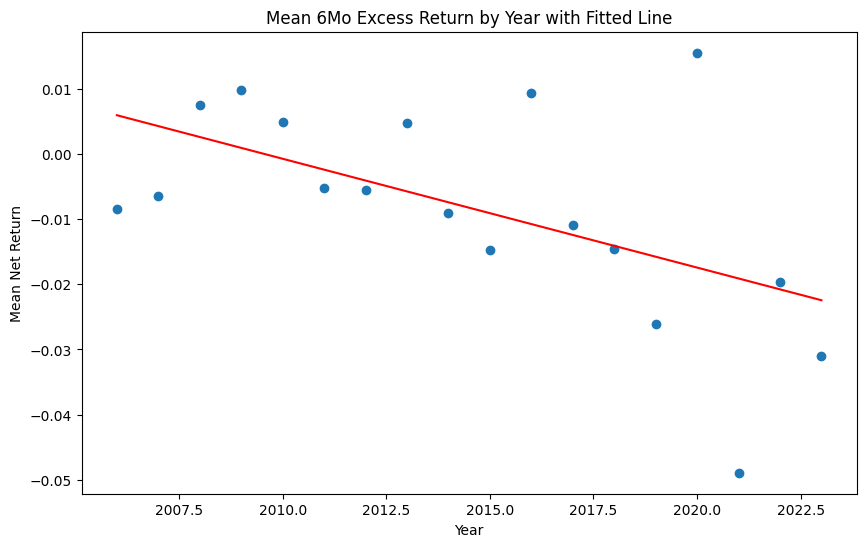

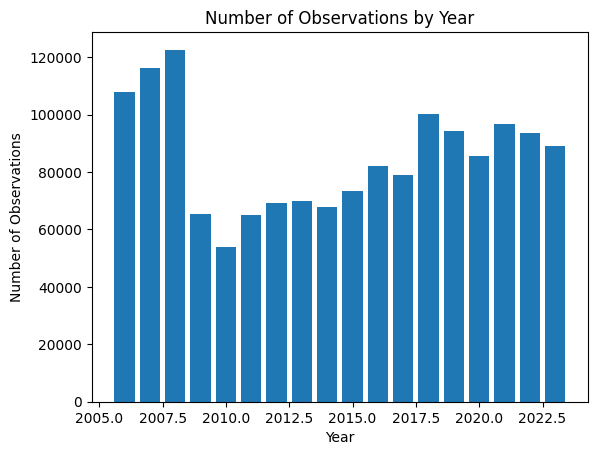

In [10]:
mean_net_ret_by_year = buys.groupby('year')['net_ret_winsorized'].mean().reset_index()

import numpy as np
x = mean_net_ret_by_year['year'].values
y = mean_net_ret_by_year['net_ret_winsorized'].values

coefficients = np.polyfit(x, y, deg=1)
poly_eq = np.poly1d(coefficients)
y_fit = poly_eq(x)
plt.figure(figsize=(10, 6))
plt.plot(mean_net_ret_by_year['year'], mean_net_ret_by_year['net_ret_winsorized'], marker='o', linestyle='', label='Data Points')
plt.plot(x, y_fit, color='red', linestyle='-', label='Fitted Line')
plt.title('Mean 6Mo Excess Return by Year with Fitted Line')
plt.xlabel('Year')
plt.ylabel('Mean Net Return')
plt.grid(False)
plt.show()

obs_count_by_year = buys['year'].value_counts().sort_index()
plt.bar(obs_count_by_year.index, obs_count_by_year.values)
plt.title('Number of Observations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.grid(False)